# Missing values and imputation


In [1]:
#import library 
import pandas as pd
import numpy as np

In [2]:
#load the data 
df1 = pd.read_csv('titanic passenger list.csv') 

Check for the number of missing value at each column

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Check data distribution for both numerical and categorical 

In [4]:
df1.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df1.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [6]:
df1.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Age

In [7]:
np.mean(df1.age)

29.881137667304014

In [8]:
df1['age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
70.50     1
76.00     1
67.00     1
0.42      1
0.67      1
Name: age, Length: 98, dtype: int64

In [9]:
df1['age'].unique()

array([29.  ,  0.92,  2.  , 30.  , 25.  , 48.  , 63.  , 39.  , 53.  ,
       71.  , 47.  , 18.  , 24.  , 26.  , 80.  ,   nan, 50.  , 32.  ,
       36.  , 37.  , 42.  , 19.  , 35.  , 28.  , 45.  , 40.  , 58.  ,
       22.  , 41.  , 44.  , 59.  , 60.  , 33.  , 17.  , 11.  , 14.  ,
       49.  , 76.  , 46.  , 27.  , 64.  , 55.  , 70.  , 38.  , 51.  ,
       31.  ,  4.  , 54.  , 23.  , 43.  , 52.  , 16.  , 32.5 , 21.  ,
       15.  , 65.  , 28.5 , 45.5 , 56.  , 13.  , 61.  , 34.  ,  6.  ,
       57.  , 62.  , 67.  ,  1.  , 12.  , 20.  ,  0.83,  8.  ,  0.67,
        7.  ,  3.  , 36.5 , 18.5 ,  5.  , 66.  ,  9.  ,  0.75, 70.5 ,
       22.5 ,  0.33,  0.17, 40.5 , 10.  , 23.5 , 34.5 , 20.5 , 30.5 ,
       55.5 , 38.5 , 14.5 , 24.5 , 60.5 , 74.  ,  0.42, 11.5 , 26.5 ])

Look at some anormal rows 

In [10]:
df1[df1['age'].isnull()].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [11]:
df1[df1['age'] < 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
359,2,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
548,2,1,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
590,2,1,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
611,3,1,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S,11,NaN,"London, England Norfolk, VA"
657,3,1,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
658,3,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"


<AxesSubplot:>

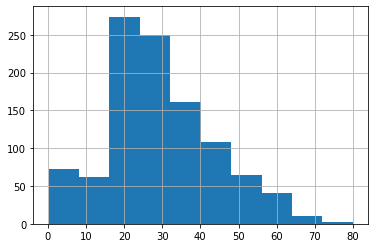

In [12]:
%matplotlib inline
df1['age'].hist()

In [13]:
sum(df1['age'].isnull())

263

In [14]:
def name_extract(word):
     return word.split(',')[1].split('.')[0].strip()

In [15]:
temp = pd.DataFrame({'Title':df1['name'].apply(name_extract)}) # testing, apply the method to the data
# check unique values
temp['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [16]:
temp['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
the Countess      1
Jonkheer          1
Capt              1
Don               1
Dona              1
Sir               1
Lady              1
Mme               1
Name: Title, dtype: int64

In [17]:
df2 = df1 # copy then insert new column
df2['Title'] = df1['name'].apply(name_extract)
df2.head() # title at far right

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [18]:
# just check (again) we got most of them
df2[df2['Title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title


In [19]:
df2[df2.age.isnull()].Title.value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Title, dtype: int64

In [20]:
df2[df2['Title'] == "Dr"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",Dr
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",Dr
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,8,NaN,"New York, NY",Dr
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",Dr
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",Dr
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",Dr


In [21]:
df2[df2['Title'] == "Dr"].mean()

pclass        1.250000
survived      0.500000
age          43.571429
sibsp         0.625000
parch         0.125000
fare         53.254688
body        230.000000
dtype: float64

In [22]:
df2[(df2['Title'] == "Dr") & (df2['sex'] == "male")].mean()

pclass        1.285714
survived      0.428571
age          42.666667
sibsp         0.714286
parch         0.142857
fare         57.158329
body        230.000000
dtype: float64

In [23]:
df2[df2['Title'] == "Master"] # how many?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
54,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Master
94,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",Master
249,1,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",Master
273,1,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,3,0,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN,Master
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Master
1256,3,1,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Master
1262,3,0,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN,Master


In [24]:
#there are a lot, 61, use describe()
df2[df2['Title'] == "Master"].describe() # min age is 0.33 (4 months?), max is 14.5, mean is 5.5

,pclass,survived,age,sibsp,parch,fare,body
count,61.000000,61.000000,53.000000,61.000000,61.000000,61.000000,3.00000
mean,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.00000
std,0.629424,0.504082,4.161554,1.961515,0.552688,40.677102,37.26929
min,1.000000,0.000000,0.330000,0.000000,0.000000,3.170800,1.00000
25%,2.000000,0.000000,2.000000,1.000000,1.000000,15.245800,2.50000
50%,3.000000,1.000000,4.000000,1.000000,1.000000,26.000000,4.00000
75%,3.000000,1.000000,9.000000,4.000000,2.000000,36.750000,35.50000
max,3.000000,1.000000,14.500000,8.000000,2.000000,262.375000,67.00000


In [25]:
df2[df2['Title'] == "Master"].mean()

pclass       2.655738
survived     0.508197
age          5.482642
sibsp        2.049180
parch        1.377049
fare        36.008195
body        24.000000
dtype: float64

In [26]:
df2["age"].fillna(df2.groupby("Title")["age"].transform("mean"), inplace=True)
df2.age.describe()

count    1309.000000
mean       29.896894
std        13.193803
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: age, dtype: float64